# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/icml_face_data.csv")
df

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [5]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [6]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [7]:
images, labels = parse_data(df)

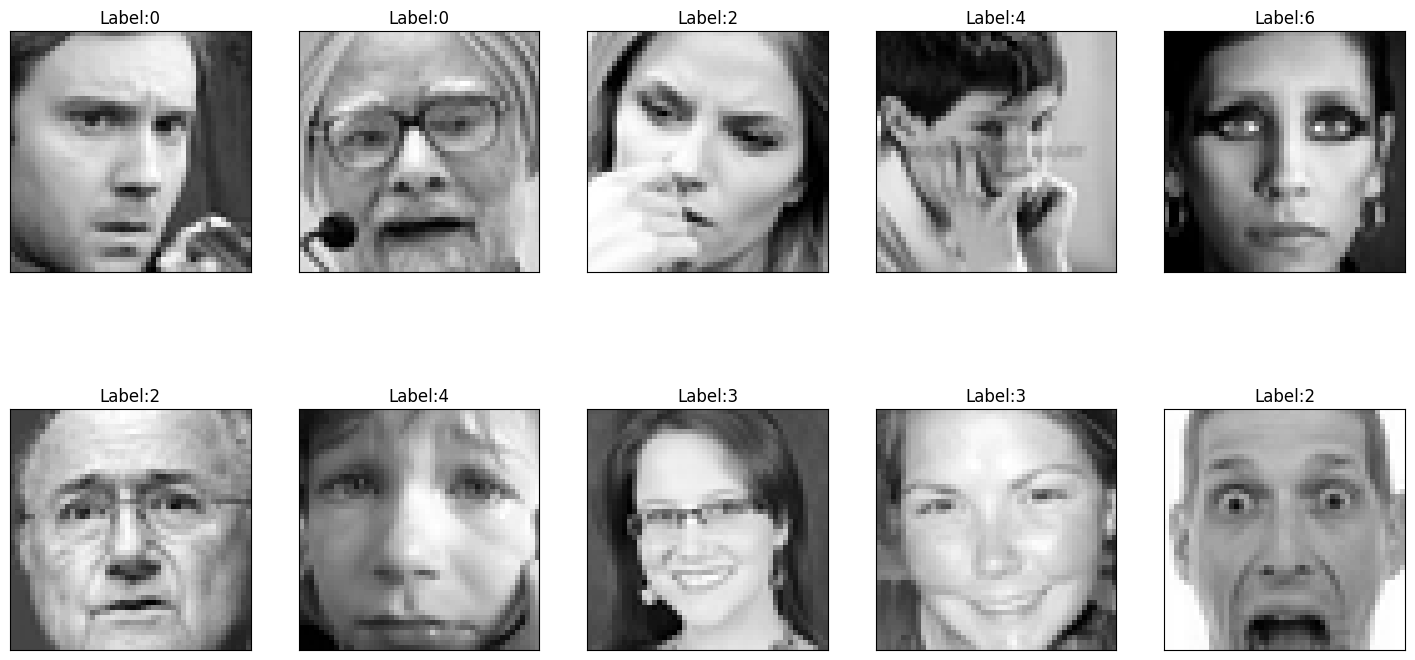

In [9]:
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [8]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)

images_reshaped = images.reshape(35887, 48*48)
pca_2.fit(images_reshaped)

images_pca_2 = pca_2.transform(images_reshaped) ## modify images' array to the appropriate shape
images_pca_2.shape

(35887, 2)

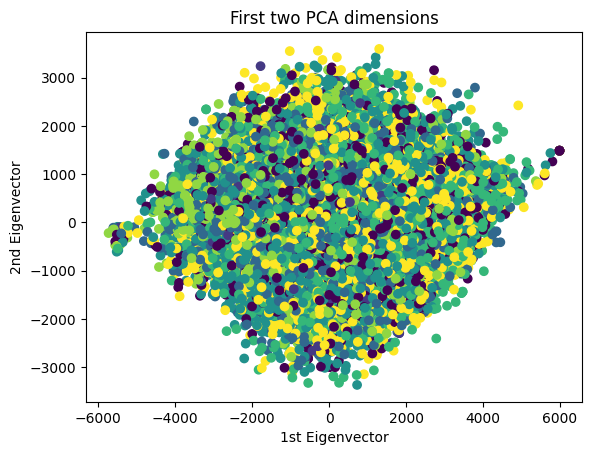

In [9]:
plt.scatter(images_pca_2[:, 0], images_pca_2[:, 1],c=labels)
plt.xlabel('1st Eigenvector')
plt.ylabel('2nd Eigenvector')
plt.title('First two PCA dimensions')
plt.show()

Question 2: How to determine the optimal number of principal components using pca.explained_variance_? Explain your selection process. (2 points)



In [10]:
pca=PCA()
pca.fit(images_reshaped)

explained_variance = pca.explained_variance_

print(f"Tổng số variance trong dữ liệu gốc: {explained_variance.sum():.4f}")

Tổng số variance trong dữ liệu gốc: 9213431.4480


Vẽ biểu đồ quan sát lượng tỉ lệ variance giữ lại so với số Principal Components

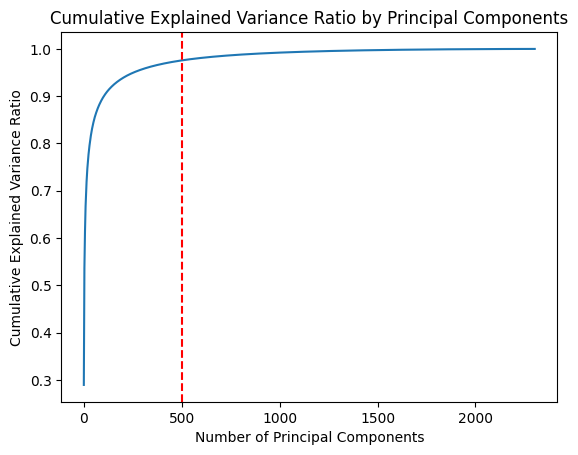

In [13]:
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance_ratio = explained_variance_ratio.sum()
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_variance_ratio)
plt.axvline(x=500, color='r', linestyle='--', label='x = 500')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()

Có thể thấy từ Principal Components thứ 500 lượng dữ liệu giữ lại tăng lên rất ít nên ta sẽ vẽ biểu đồ của 500 Principal Components đầu tiên để quan sát rõ hơn

In [14]:
pca=PCA(n_components=500)
pca.fit(images_reshaped)

PCA(n_components=500)

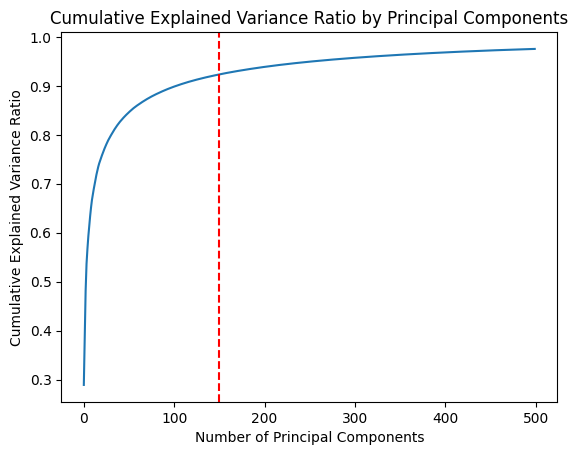

In [16]:
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance_ratio = explained_variance_ratio.sum()
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_variance_ratio)
plt.axvline(x=150, color='r', linestyle='--', label='x = 150')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()

In [17]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum >= 0.9) + 1

print(f"Lượng Principal Components cần để giữ lại 90% dữ liệu :{d}")

Lượng Principal Components cần để giữ lại 90% dữ liệu :104


Vậy ta cần 104 Principal Components để dữ liệu mới sau khi áp dụng PCA sẽ giữ lại 90% so với dữ liệu gốc. Quan sát biểu đồ trên ta có thể thấy từ khoảng Principal Components thứ 150 thì lượng dữ liệu được giữ lại sẽ tăng khá chậm và sẽ giữ được >90% dữ liệu nên ở đây ta chọn Optimal Principal Components sẽ là 150

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import cv2
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

Vì dữ liệu gốc gồm các ảnh 48x48 sẽ tốn rất nhiều thời gian để huấn luyện nên ta sẽ resize thành các ảnh 32x32 để huấn luyện nhanh hơn


In [12]:
def resize_images(images, size=(32, 32)):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, size)
        resized_images.append(resized_image)
    return np.array(resized_images)

images_resized = resize_images(images, size=(32,32)).reshape(35887, 32*32)

Chia dữ liệu thành các tập train, test

In [13]:
#Original data
X_train, X_test, y_train, y_test = train_test_split(images_resized, labels, test_size=0.2, random_state=42)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#PCA data
images_pca = PCA(n_components=150).fit_transform(images_reshaped)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(images_pca, labels, test_size=0.2, random_state=43)

X_train_pca = StandardScaler().fit_transform(X_train_pca)
X_test_pca = StandardScaler().fit_transform(X_test_pca)

SVM model

In [25]:
svm_param_grid = {
        'C': [1,10]
    }

svm_model = SVC(random_state=42)

svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=2, n_jobs=-1, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

print("SVM Model on Original data:")
print("Best parameters: ", svm_grid_search.best_params_)
svm_y_pred = svm_grid_search.predict(X_test)
print("Accuracy :", accuracy_score(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))
print("-------------------------------------------------------------------------------")

svm_grid_search_pca = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=2, n_jobs=-1, scoring='accuracy')
svm_grid_search_pca.fit(X_train_pca, y_train_pca)

print("SVM Model on PCA data:")
print("Best parameters: ", svm_grid_search_pca.best_params_)
svm_y_pred_pca = svm_grid_search_pca.predict(X_test_pca)
print("Accuracy :", accuracy_score(y_test_pca, svm_y_pred_pca))
print(classification_report(y_test_pca, svm_y_pred_pca))

SVM Model on Original data:
Best parameters:  {'C': 10}
Accuracy : 0.4887155196433547
              precision    recall  f1-score   support

           0       0.37      0.38      0.37       985
           1       0.82      0.50      0.62       102
           2       0.43      0.40      0.42      1043
           3       0.58      0.66      0.62      1765
           4       0.37      0.37      0.37      1210
           5       0.70      0.60      0.65       795
           6       0.46      0.44      0.45      1278

    accuracy                           0.49      7178
   macro avg       0.53      0.48      0.50      7178
weighted avg       0.49      0.49      0.49      7178

-------------------------------------------------------------------------------
SVM Model on PCA data:
Best parameters:  {'C': 10}
Accuracy : 0.4772917247144051
              precision    recall  f1-score   support

           0       0.36      0.32      0.34      1042
           1       0.96      0.42      0.59    

KNN model

In [16]:
knn_param_grid = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
    }

knn_model = KNeighborsClassifier()

knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=2, n_jobs=-1, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

print("KNN Model on Original Data:")
print("Best parameters: ",knn_grid_search.best_params_)
knn_y_pred = knn_grid_search.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))
print("-------------------------------------------------------------------------------")

knn_grid_search_pca = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=2, n_jobs=-1, scoring='accuracy')
knn_grid_search_pca.fit(X_train_pca, y_train_pca)

print("KNN Model on PCA Data:")
print("Best parameters: ",knn_grid_search_pca.best_params_)
knn_y_pred_pca = knn_grid_search_pca.predict(X_test_pca)
print("Accuracy : ", accuracy_score(y_test_pca, knn_y_pred_pca))
print(classification_report(y_test_pca, knn_y_pred_pca))

KNN Model on Original Data:
Best parameters:  {'n_neighbors': 5, 'weights': 'distance'}
Accuracy :  0.4080523822791864
              precision    recall  f1-score   support

           0       0.41      0.28      0.33       985
           1       0.38      0.50      0.43       102
           2       0.41      0.34      0.37      1043
           3       0.46      0.51      0.48      1765
           4       0.37      0.31      0.34      1210
           5       0.55      0.54      0.54       795
           6       0.31      0.43      0.36      1278

    accuracy                           0.41      7178
   macro avg       0.41      0.42      0.41      7178
weighted avg       0.41      0.41      0.41      7178

-------------------------------------------------------------------------------
KNN Model on PCA Data:
Best parameters:  {'n_neighbors': 3, 'weights': 'distance'}
Accuracy :  0.36458623572025634
              precision    recall  f1-score   support

           0       0.38      0.25 

Decision Tree model

In [17]:
dt_param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, 20]
    }

dt_model = DecisionTreeClassifier()

dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=2, n_jobs=-1, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

print("Decision Tree Model on Origianl data:")
print("Best parameters: ",dt_grid_search.best_params_)
dt_y_pred = dt_grid_search.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

print("-------------------------------------------------------------------------------")

dt_grid_search_pca = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=2, n_jobs=-1, scoring='accuracy')
dt_grid_search_pca.fit(X_train_pca, y_train_pca)

print("Decision Tree Model on PCA data:")
print("Best parameters: ",dt_grid_search_pca.best_params_)
dt_y_pred_pca = dt_grid_search_pca.predict(X_test_pca)
print("Accuracy : ", accuracy_score(y_test_pca, dt_y_pred_pca))
print(classification_report(y_test_pca, dt_y_pred_pca))

Decision Tree Model on Origianl data:
Best parameters:  {'criterion': 'entropy', 'max_depth': 5}
Accuracy :  0.296600724435776
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       985
           1       0.00      0.00      0.00       102
           2       0.20      0.05      0.08      1043
           3       0.32      0.75      0.45      1765
           4       0.23      0.26      0.24      1210
           5       0.34      0.41      0.37       795
           6       0.24      0.09      0.13      1278

    accuracy                           0.30      7178
   macro avg       0.19      0.22      0.18      7178
weighted avg       0.23      0.30      0.23      7178

-------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Model on PCA data:
Best parameters:  {'criterion': 'entropy', 'max_depth': 5}
Accuracy :  0.2915853998328225
              precision    recall  f1-score   support

           0       0.75      0.00      0.01      1042
           1       0.00      0.00      0.00       106
           2       0.19      0.04      0.07      1026
           3       0.35      0.69      0.46      1845
           4       0.19      0.19      0.19      1130
           5       0.33      0.34      0.33       781
           6       0.21      0.24      0.23      1248

    accuracy                           0.29      7178
   macro avg       0.29      0.21      0.18      7178
weighted avg       0.33      0.29      0.24      7178



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP model

In [18]:
mlp_param_grid = {
        'hidden_layer_sizes': [(100,), (200,)],
        'activation': ['relu'],
        'solver': ['adam'],
        'max_iter': [200,300],
        'learning_rate': ['adaptive']

    }
mlp_model = MLPClassifier()

mlp_grid_search = GridSearchCV(estimator=mlp_model, param_grid=mlp_param_grid, cv=2, n_jobs=-1, scoring='accuracy')
mlp_grid_search.fit(X_train, y_train)

print("MLP Model on Original data:")
print("Best parameters: ",mlp_grid_search.best_params_)
mlp_y_pred = mlp_grid_search.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, mlp_y_pred))
print(classification_report(y_test, mlp_y_pred))
print("-------------------------------------------------------------------------------")

mlp_grid_search_pca = GridSearchCV(estimator=mlp_model, param_grid=mlp_param_grid, cv=2, n_jobs=-1, scoring='accuracy')
mlp_grid_search_pca.fit(X_train_pca, y_train_pca)

print("MLP Moldel on PCA data:")
print("Best parameters: ",mlp_grid_search_pca.best_params_)
mlp_y_pred_pca = mlp_grid_search_pca.predict(X_test_pca)
print("Accuracy : ", accuracy_score(y_test_pca, mlp_y_pred_pca))
print(classification_report(y_test_pca, mlp_y_pred_pca))

MLP Model on Original data:
Best parameters:  {'activation': 'relu', 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive', 'max_iter': 300, 'solver': 'adam'}
Accuracy :  0.41613262747283364
              precision    recall  f1-score   support

           0       0.31      0.34      0.33       985
           1       0.51      0.42      0.46       102
           2       0.35      0.29      0.32      1043
           3       0.55      0.56      0.55      1765
           4       0.30      0.34      0.32      1210
           5       0.57      0.57      0.57       795
           6       0.38      0.36      0.37      1278

    accuracy                           0.42      7178
   macro avg       0.42      0.41      0.42      7178
weighted avg       0.42      0.42      0.42      7178

-------------------------------------------------------------------------------
MLP Moldel on PCA data:
Best parameters:  {'activation': 'relu', 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive', 'max

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)

#Đánh giá mô hình trên Original dataa

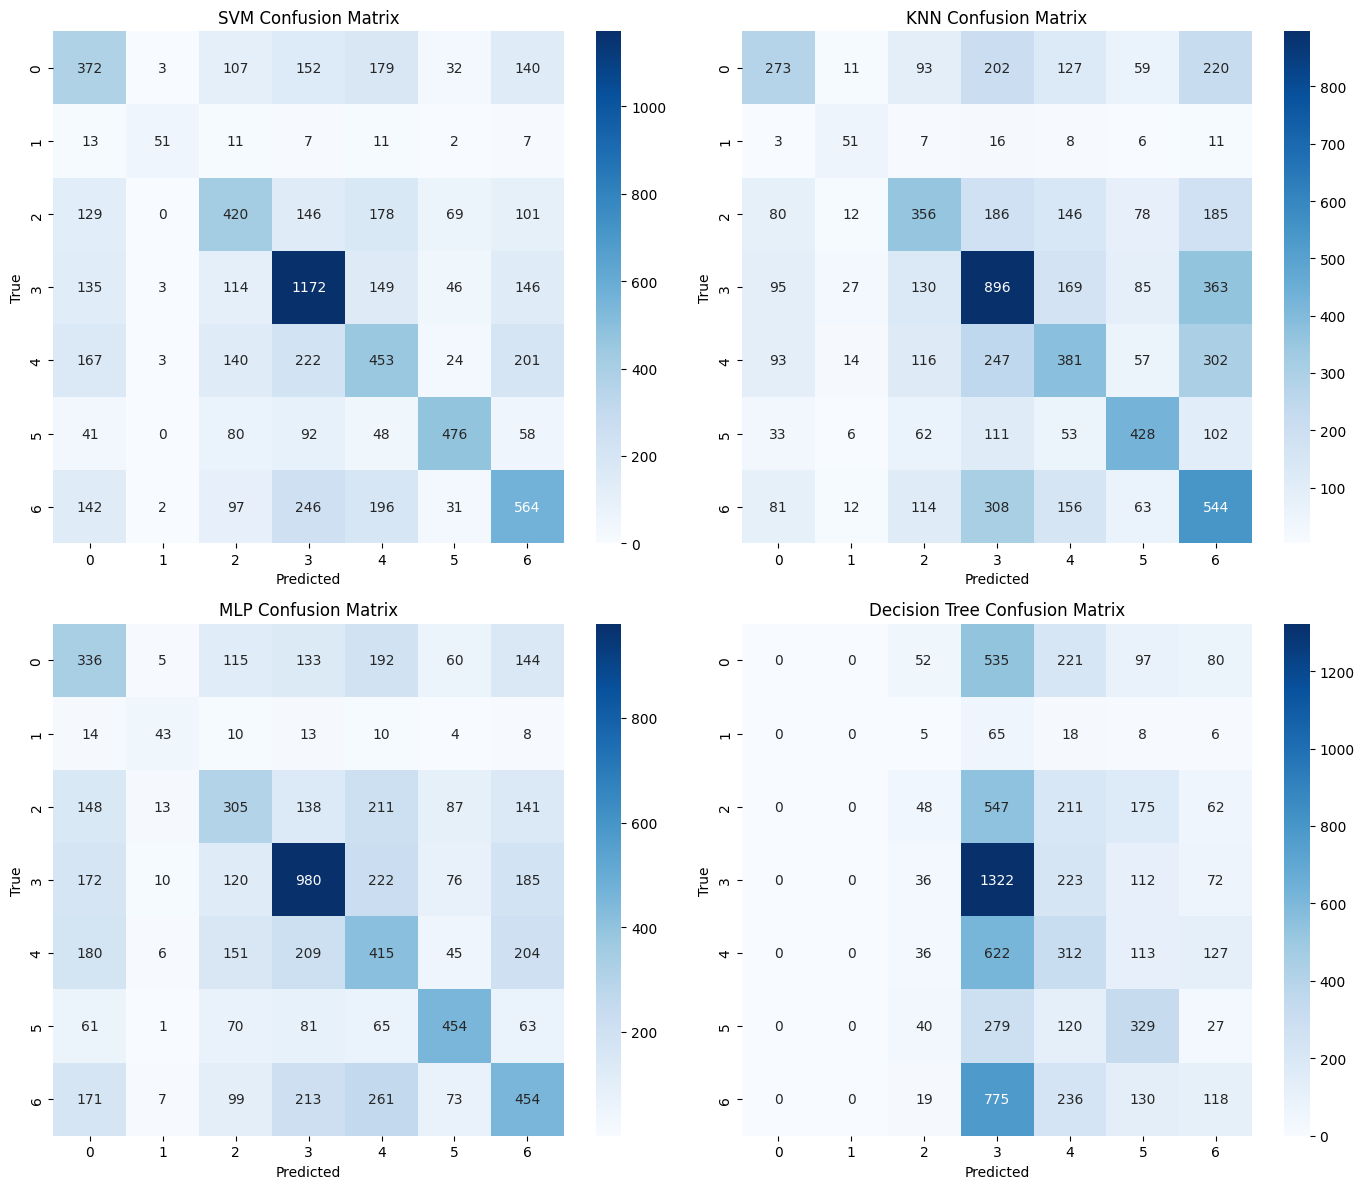

Classification Report for SVM
              precision    recall  f1-score   support

           0       0.37      0.38      0.37       985
           1       0.82      0.50      0.62       102
           2       0.43      0.40      0.42      1043
           3       0.58      0.66      0.62      1765
           4       0.37      0.37      0.37      1210
           5       0.70      0.60      0.65       795
           6       0.46      0.44      0.45      1278

    accuracy                           0.49      7178
   macro avg       0.53      0.48      0.50      7178
weighted avg       0.49      0.49      0.49      7178

Classification Report for KNN
              precision    recall  f1-score   support

           0       0.41      0.28      0.33       985
           1       0.38      0.50      0.43       102
           2       0.41      0.34      0.37      1043
           3       0.46      0.51      0.48      1765
           4       0.37      0.31      0.34      1210
           5      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
models = ['SVM', 'KNN', 'MLP', 'Decision Tree']
predictions = [svm_y_pred, knn_y_pred, mlp_y_pred, dt_y_pred]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for ax, model, y_pred in zip(axes.flatten(), models, predictions):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

for model, y_pred in zip(models, predictions):
    print(f"Classification Report for {model}")
    print(classification_report(y_test, y_pred))

Nhận Xét Từng Mô Hình

SVM (Support Vector Machine)

- Accuracy: 0.49 - Độ chính xác cao nhất trong bốn mô hình.
- Precision, Recall và F1-Score: Cao nhất trong bốn mô hình, cho thấy SVM có hiệu suất tốt nhất tổng thể.
- Loại cảm xúc chính xác nhất: Loại 3 với số lượng dự đoán đúng cao nhất (1172).
- Loại cảm xúc mắc lỗi nhiều nhất: Loại 6 với nhiều nhãn bị phân loại nhầm nhất, mặc dù có số lượng dự đoán đúng cao (564).

KNN (K-Nearest Neighbors)

- Accuracy: 0.41 - Độ chính xác thấp hơn SVM và MLP.
- Precision, Recall và F1-Score: Trung bình, thấp hơn SVM và MLP nhưng cao hơn Decision Tree.
- Loại cảm xúc chính xác nhất: Loại 3 với số lượng dự đoán đúng cao nhất (896).
- Loại cảm xúc mắc lỗi nhiều nhất: Loại 6 với nhiều nhãn bị phân loại nhầm nhất (544).

MLP (Multi-Layer Perceptron)

- Accuracy: 0.42 - Độ chính xác tương đối cao, chỉ đứng sau SVM.
- Precision, Recall và F1-Score: Tốt, nhưng thấp hơn SVM.
- Loại cảm xúc chính xác nhất: Loại 3 với số lượng dự đoán đúng cao nhất (980).
- Loại cảm xúc mắc lỗi nhiều nhất: Loại 6 với nhiều nhãn bị phân loại nhầm nhất (454).

Decision Tree

- Accuracy: 0.30 - Độ chính xác thấp nhất trong bốn mô hình.
- Precision, Recall và F1-Score: Thấp nhất, cho thấy Decision Tree có hiệu suất kém nhất.
- Loại cảm xúc chính xác nhất: Loại 3 với số lượng dự đoán đúng cao nhất (1322).
- Loại cảm xúc mắc lỗi nhiều nhất: Loại 6 với nhiều nhãn bị phân loại nhầm nhất (775).

Tổng Kết

- SVM là mô hình có hiệu suất tốt nhất với tất cả các chỉ số đều cao nhất. Nó phân loại tốt nhất cho các cảm xúc loại 3 và 5, nhưng gặp khó khăn với các loại 0 và 6.
- MLP có hiệu suất tốt thứ hai, đặc biệt là trong việc phân loại các cảm xúc loại 3 và 5. Nó cũng gặp khó khăn với các loại cảm xúc 0 và 6.
- KNN có hiệu suất trung bình, phân loại tốt nhất cho cảm xúc loại 3 và kém nhất cho loại 6.
- Decision Tree có hiệu suất kém nhất, đặc biệt gặp khó khăn với các cảm xúc loại 0, 1 và 6.

#Đánh giá mô hình trên PCA data

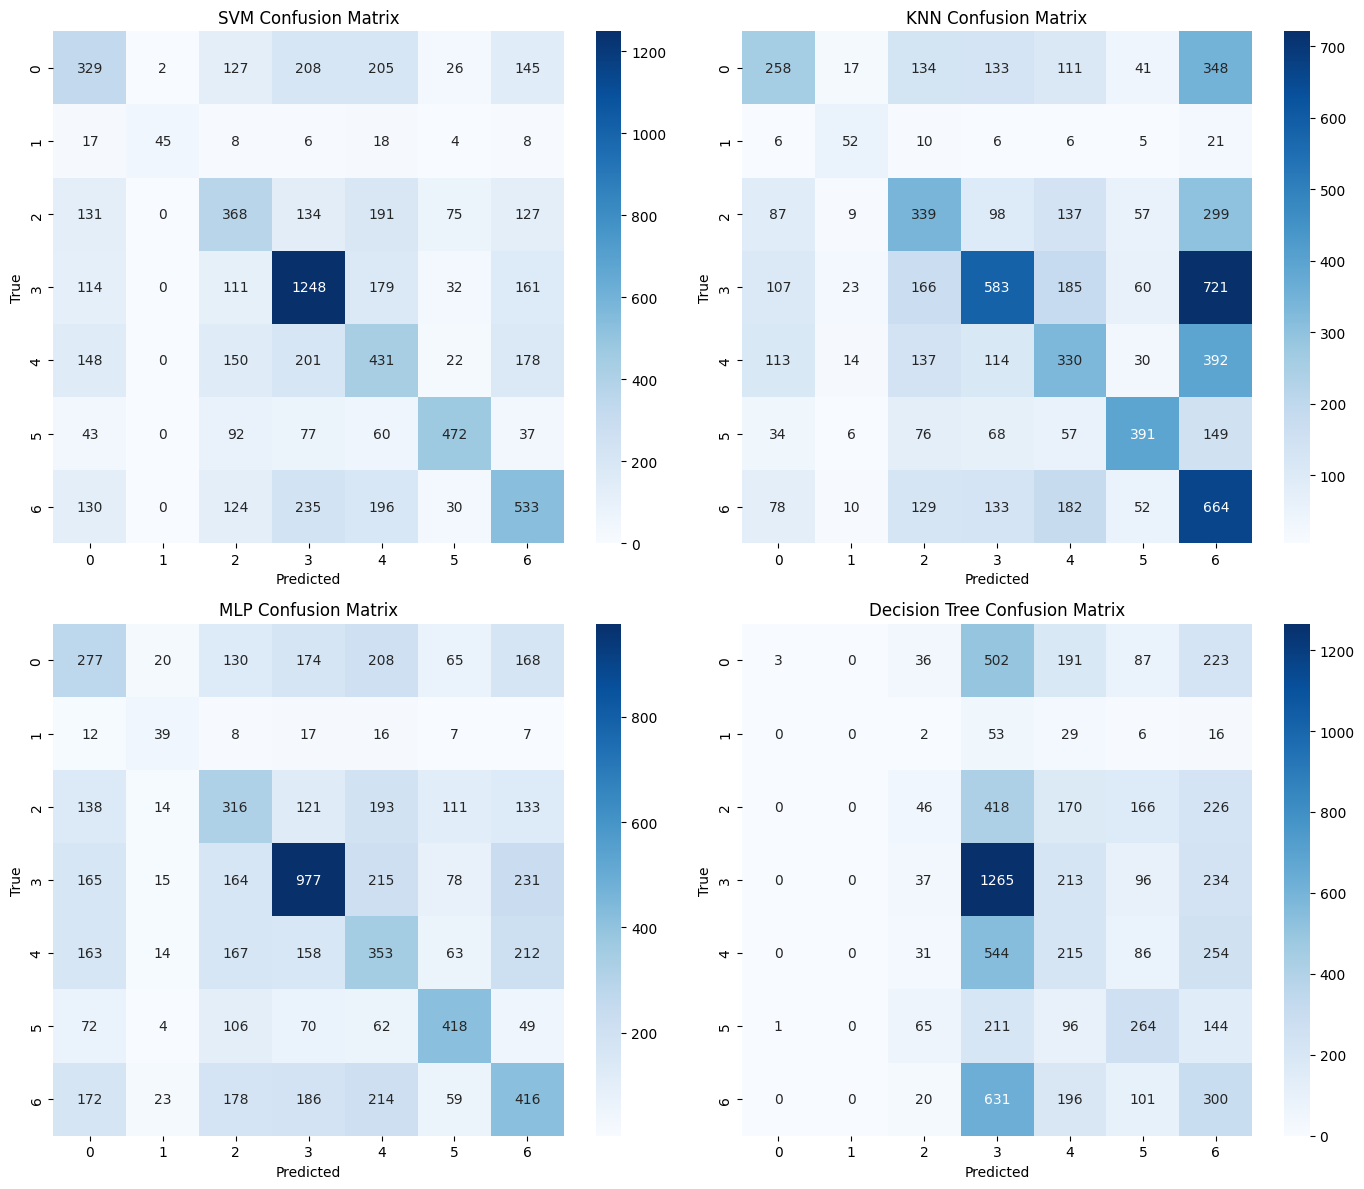

Classification Report for SVM
              precision    recall  f1-score   support

           0       0.36      0.32      0.34      1042
           1       0.96      0.42      0.59       106
           2       0.38      0.36      0.37      1026
           3       0.59      0.68      0.63      1845
           4       0.34      0.38      0.36      1130
           5       0.71      0.60      0.65       781
           6       0.45      0.43      0.44      1248

    accuracy                           0.48      7178
   macro avg       0.54      0.46      0.48      7178
weighted avg       0.48      0.48      0.48      7178

Classification Report for KNN
              precision    recall  f1-score   support

           0       0.38      0.25      0.30      1042
           1       0.40      0.49      0.44       106
           2       0.34      0.33      0.34      1026
           3       0.51      0.32      0.39      1845
           4       0.33      0.29      0.31      1130
           5      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
models = ['SVM', 'KNN', 'MLP', 'Decision Tree']
predictions_pca = [svm_y_pred_pca, knn_y_pred_pca, mlp_y_pred_pca, dt_y_pred_pca]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for ax, model, y_pred in zip(axes.flatten(), models_pca, predictions_pca):
    cm = confusion_matrix(y_test_pca, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

for model, y_pred in zip(models_pca, predictions_pca):
    print(f"Classification Report for {model}")
    print(classification_report(y_test_pca, y_pred))


Nhận xét từng mô hình
S
VM (Support Vector Machine)

- Accuracy: 0.49 - Độ chính xác cao nhất trong bốn mô hình.
- Precision, Recall và F1-Score: Cao nhất trong bốn mô hình, cho thấy SVM có hiệu suất tốt nhất tổng thể.
- Loại cảm xúc chính xác nhất: Loại 3 với số lượng dự đoán đúng cao nhất (1248).
- Loại cảm xúc mắc lỗi nhiều nhất: Loại 0 với nhiều nhãn bị phân loại nhầm nhất (chỉ có 329 dự đoán đúng).

KNN (K-Nearest Neighbors)

- Accuracy: 0.41 - Độ chính xác thấp hơn SVM và MLP.
- Precision, Recall và F1-Score: Trung bình, thấp hơn SVM và MLP nhưng cao hơn Decision Tree.
- Loại cảm xúc chính xác nhất: Loại 3 với số lượng dự đoán đúng cao nhất (583).
- Loại cảm xúc mắc lỗi nhiều nhất: Loại 0 với nhiều nhãn bị phân loại nhầm nhất (258 dự đoán đúng).

MLP (Multi-Layer Perceptron)

- Accuracy: 0.40 - Độ chính xác tương đối cao, chỉ đứng sau SVM.
- Precision, Recall và F1-Score: Tốt, nhưng thấp hơn SVM.
- Loại cảm xúc chính xác nhất: Loại 3 với số lượng dự đoán đúng cao nhất (977).
- Loại cảm xúc mắc lỗi nhiều nhất: Loại 0 với nhiều nhãn bị phân loại nhầm nhất (277 dự đoán đúng).

Decision Tree

- Accuracy: 0.30 - Độ chính xác thấp nhất trong bốn mô hình.
- Precision, Recall và F1-Score: Thấp nhất, cho thấy Decision Tree có hiệu suất kém nhất.
- Loại cảm xúc chính xác nhất: Loại 3 với số lượng dự đoán đúng cao nhất (1265).
- Loại cảm xúc mắc lỗi nhiều nhất: Loại 6 với nhiều nhãn bị phân loại nhầm nhất (631).

Tổng kết
- SVM là mô hình có hiệu suất tốt nhất với tất cả các chỉ số đều cao nhất. Nó phân loại tốt nhất cho các cảm xúc loại 3 và 5, nhưng gặp khó khăn với các loại 0 và 6.
- MLP có hiệu suất tốt thứ hai, đặc biệt là trong việc phân loại các cảm xúc loại 3 và 5. Nó cũng gặp khó khăn với các loại cảm xúc 0 và 6.
- KNN có hiệu suất trung bình, phân loại tốt nhất cho cảm xúc loại 3 và kém nhất cho loại 0.
- Decision Tree có hiệu suất kém nhất, đặc biệt gặp khó khăn với các cảm xúc loại 0, 1 và 6.

#Tổng kết lại cả 2 trường hợp Original data và PCA data ta thấy rằng các mô hình đều cho ra kết quả gần như ngang nhau. Với dữ liệu gốc sẽ có kết quả cao hơn một chút so với dữ liệu đã giảm chiều bằng PCA.